<a href="https://colab.research.google.com/github/jronald88/titanic/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import MinMaxScaler, RobustScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, f1_score, make_scorer
from sklearn.metrics import classification_report
from sklearn import tree
from xgboost import XGBClassifier, plot_importance
from sklearn import metrics


warnings.filterwarnings('ignore')
#

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [120]:
!unzip "/content/drive/MyDrive/Datasets/titanic.zip"

Archive:  /content/drive/MyDrive/Datasets/titanic.zip
replace gender_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [121]:
df_train= pd.read_csv('/content/train.csv')
df_test= pd.read_csv('/content/test.csv')

In [122]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [123]:
df_train.shape

(891, 12)

In [124]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [125]:
df_train['family'] = df_train['SibSp'] + df_train['Parch']
df_test['family'] = df_test['SibSp'] + df_test['Parch']

In [126]:
df_test.drop(['Name','SibSp','Parch','PassengerId'],axis=1,inplace=True)


In [127]:
df_train.drop(['Name','SibSp','Parch','PassengerId'],axis=1,inplace=True)

In [128]:
df_test.shape

(418, 8)

In [129]:
df_train.shape

(891, 9)

In [130]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   Ticket    891 non-null    object 
 5   Fare      891 non-null    float64
 6   Cabin     204 non-null    object 
 7   Embarked  889 non-null    object 
 8   family    891 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 62.8+ KB


In [131]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   Ticket    418 non-null    object 
 4   Fare      417 non-null    float64
 5   Cabin     91 non-null     object 
 6   Embarked  418 non-null    object 
 7   family    418 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 26.2+ KB


In [132]:
label_encoder= LabelEncoder()
df_train['Sex']= label_encoder.fit_transform(df_train['Sex'])
df_test['Sex']= label_encoder.fit_transform(df_test['Sex'])

In [133]:
df_train['Embarked']= label_encoder.fit_transform(df_train['Embarked'])
df_test['Embarked']= label_encoder.fit_transform(df_test['Embarked'])
df_train['Cabin']= label_encoder.fit_transform(df_train['Cabin'])
df_test['Cabin']= label_encoder.fit_transform(df_test['Cabin'])
df_train['Ticket']= label_encoder.fit_transform(df_train['Ticket'])
df_test['Ticket']= label_encoder.fit_transform(df_test['Ticket'])

In [134]:
print(f'There are {df_train.isnull().sum().sum()} missing values in the train dataset')
print(f'There are {df_test.isnull().sum().sum()} missing values in the test dataset')
print(f'There are {df_train.duplicated().sum()} duplicated values in the train dataset')
print(f'There are {df_test.duplicated().sum()} duplicated values in the test dataset')

There are 177 missing values in the train dataset
There are 87 missing values in the test dataset
There are 15 duplicated values in the train dataset
There are 2 duplicated values in the test dataset


In [135]:
df_train['Age'].fillna(df_train['Age'].mean(),inplace=True)
df_test['Age'].fillna(df_test['Age'].mean(),inplace=True)
df_test['Fare'].fillna(df_test['Fare'].mean(),inplace=True)

In [136]:
df_total.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.000000,1.000,1.0000
Pclass,1309.0,2.294882,0.837836,1.00,2.0000,3.000000,3.000,3.0000
Sex,1309.0,0.644003,0.478997,0.00,0.0000,1.000000,1.000,1.0000
Age,1309.0,29.882243,12.883758,0.17,22.0000,29.699118,35.000,80.0000
Ticket,1309.0,288.207792,191.147468,0.00,126.0000,264.000000,436.000,680.0000
Fare,1309.0,33.297261,51.738919,0.00,7.8958,14.454200,31.275,512.3292
Cabin,1309.0,110.528648,43.254935,0.00,76.0000,147.000000,147.000,147.0000
Embarked,1309.0,1.495034,0.816130,0.00,1.0000,2.000000,2.000,3.0000
family,1309.0,0.883881,1.583639,0.00,0.0000,0.000000,1.000,10.0000


#**Data Visualisation**

In [137]:
df_total = pd.concat([df_train,df_test])

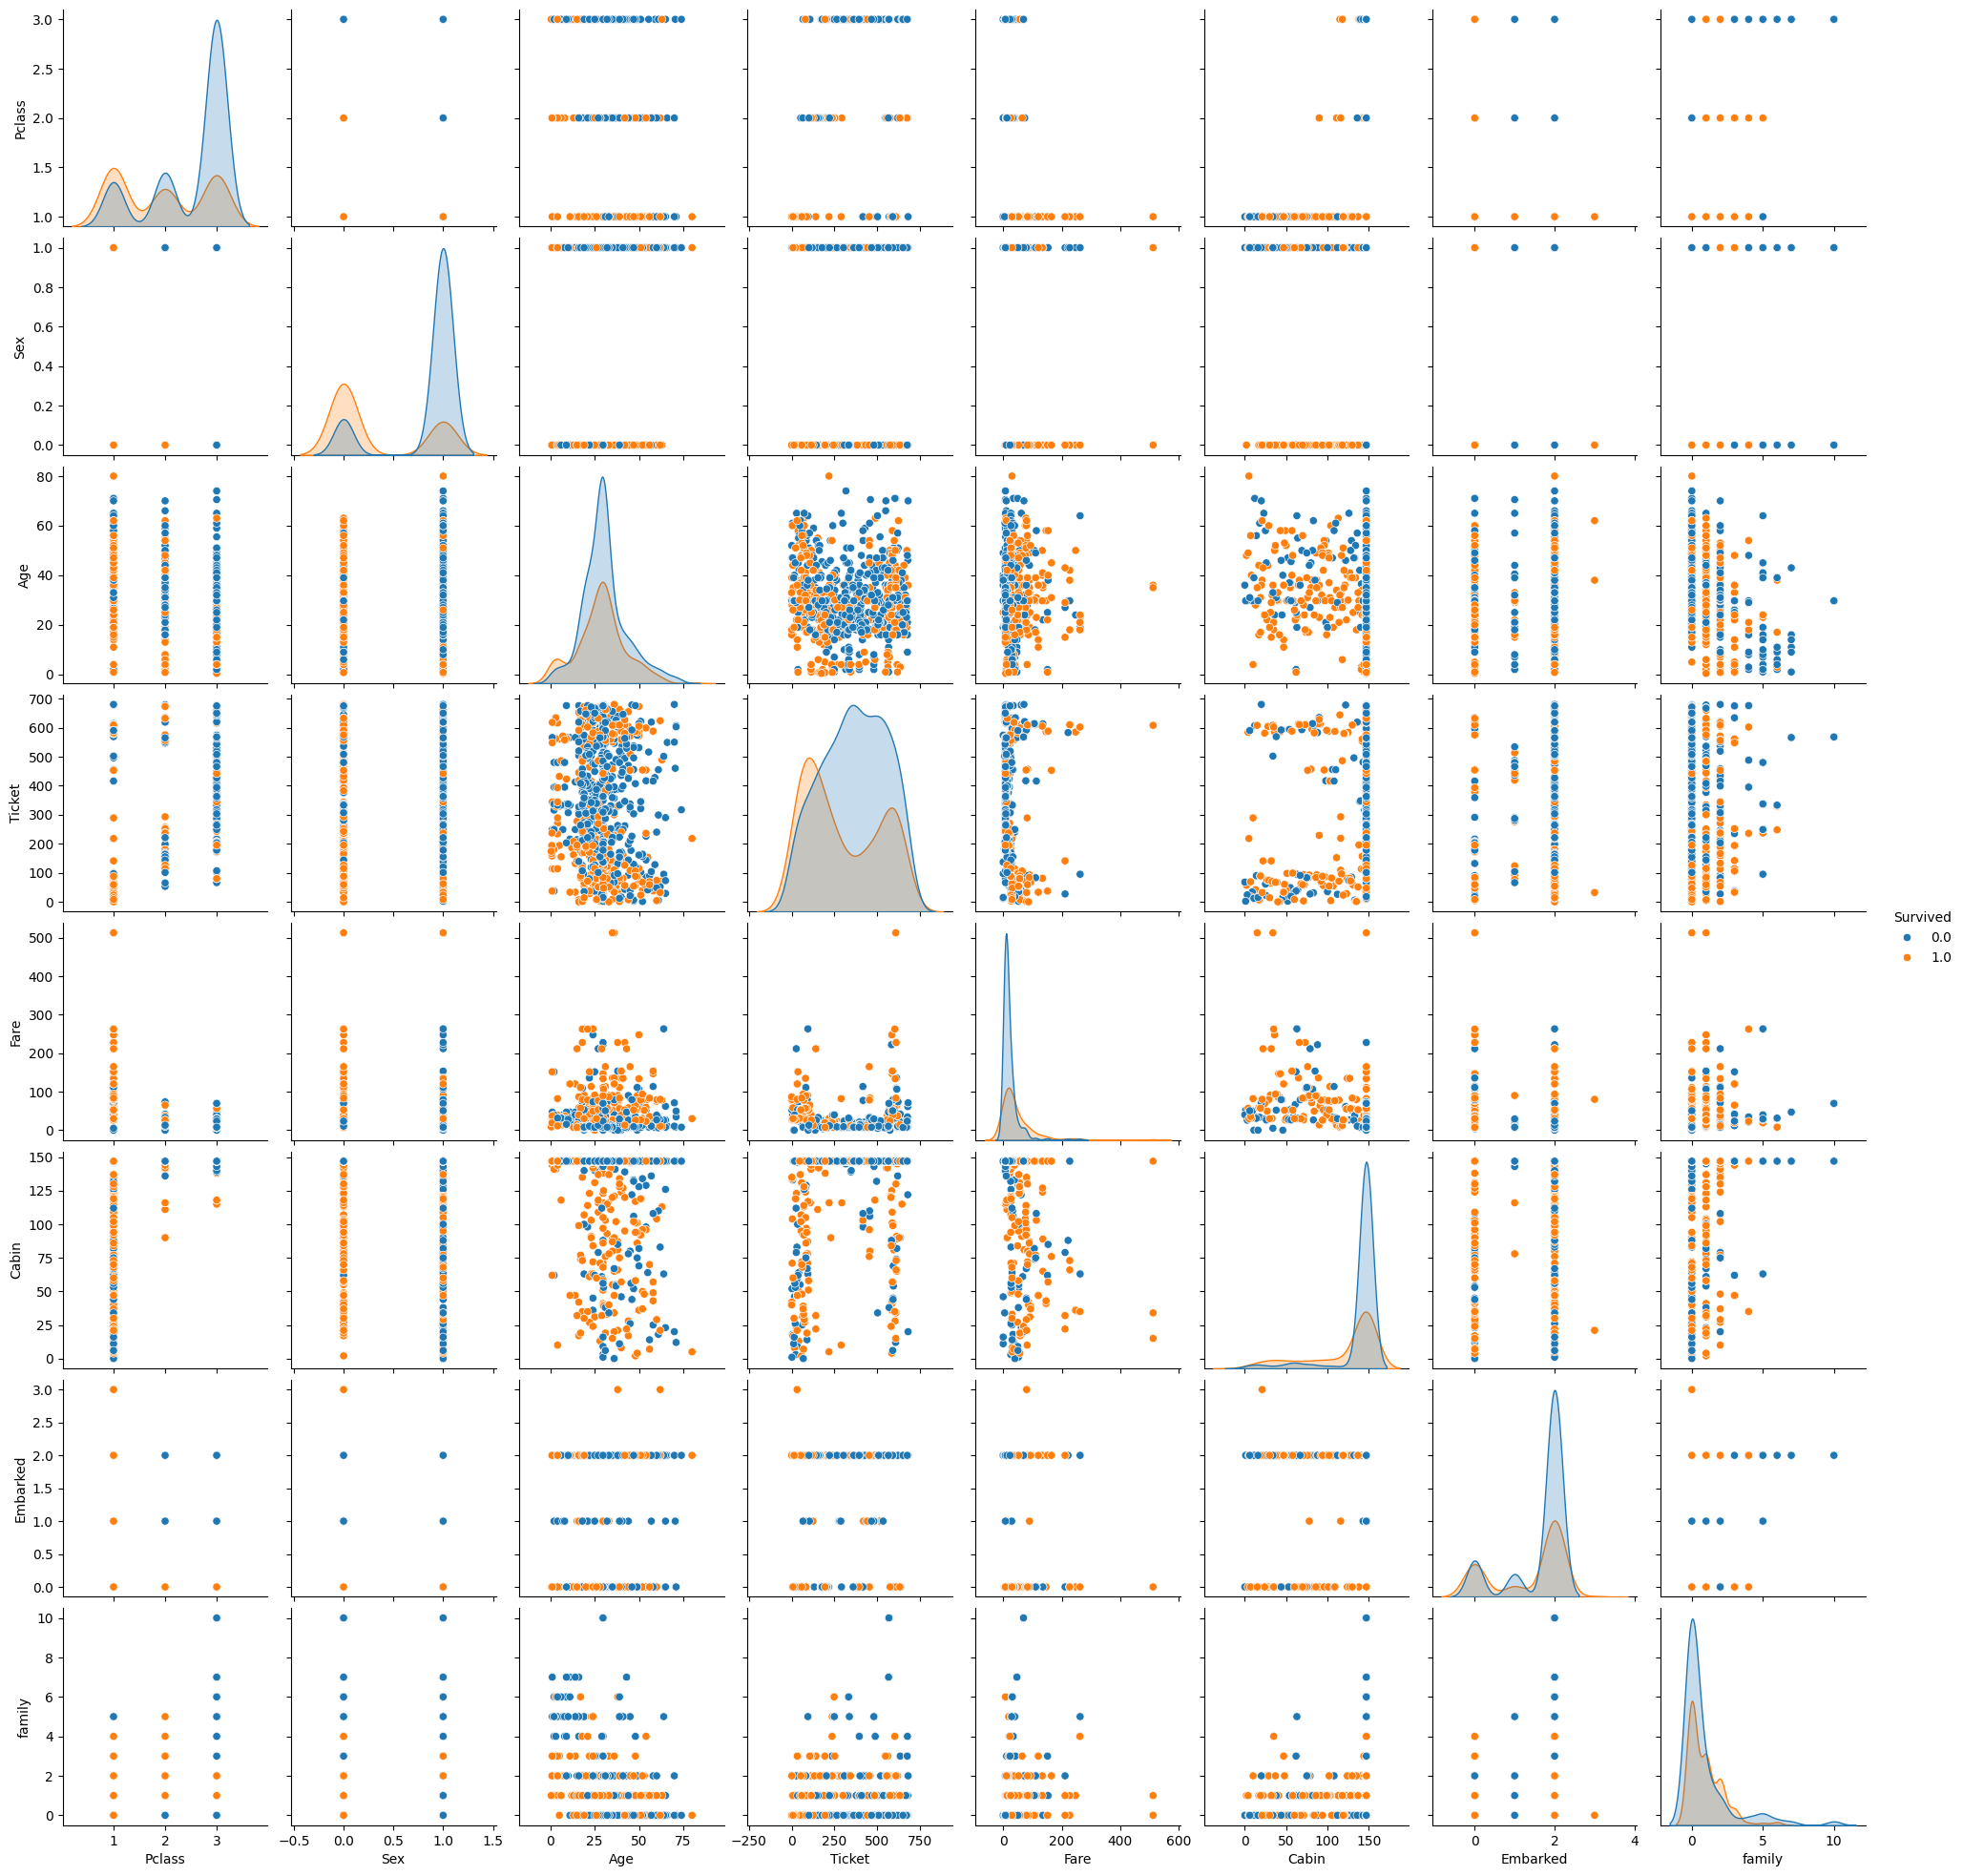

In [138]:
sns.pairplot(df_total,hue='Survived')

<Axes: >

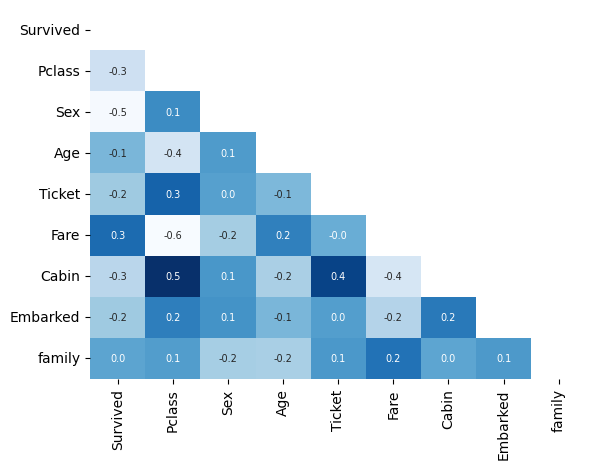

In [139]:
corr=df_total.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(df_total.corr(),annot=True, cbar=False,fmt=".1f", cmap = 'Blues',annot_kws={"size": 7},mask=mask)

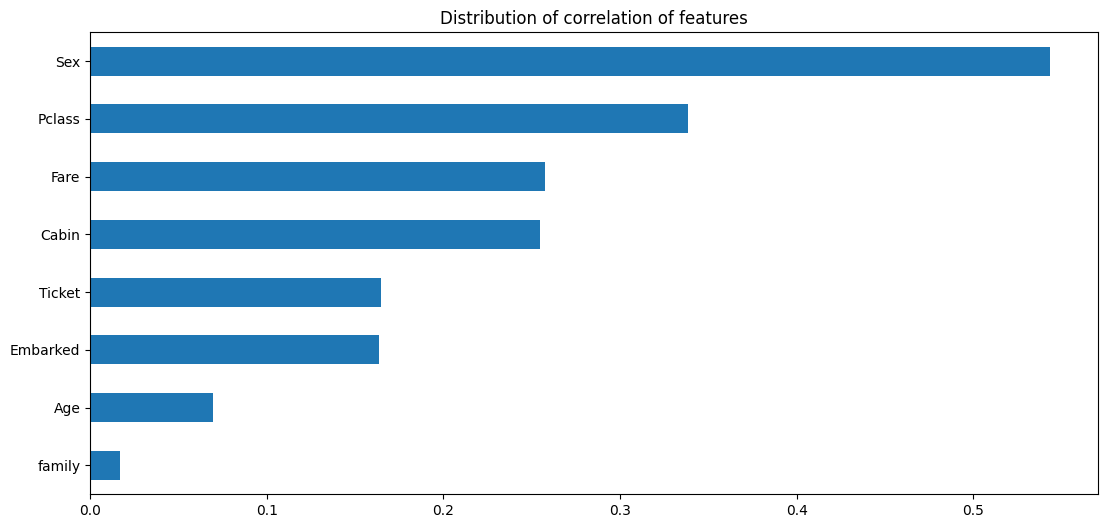

In [140]:
plt.figure(figsize = (13,6))
plt.title('Distribution of correlation of features')
correlation_values = abs(corr['Survived']).sort_values()[:-1].plot.barh()
plt.show()

<Axes: xlabel='Sex', ylabel='Cabin'>

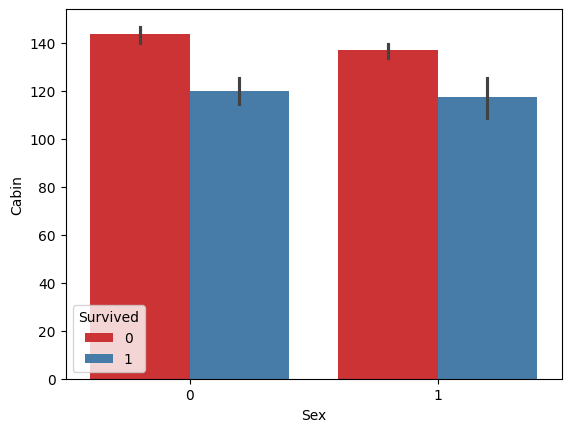

In [141]:
sns.barplot(x='Sex',y='Cabin', hue='Survived',data=df_train,palette='Set1', legend='full')


Text(0.5, 1.0, 'Survived')

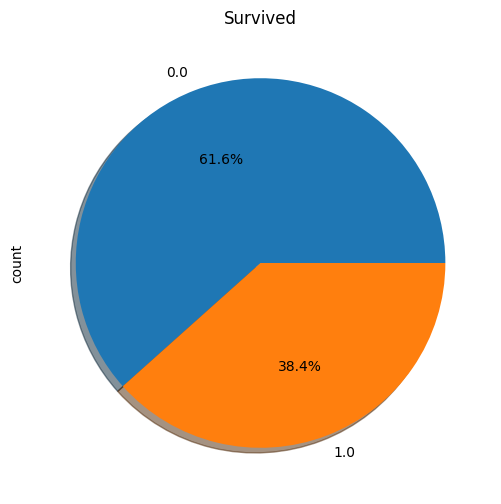

In [142]:
df_total['Survived'].value_counts().plot.pie(autopct='%1.1f%%', shadow = True, figsize = (6,6))
plt.title('Survived')

<Axes: xlabel='Pclass', ylabel='count'>

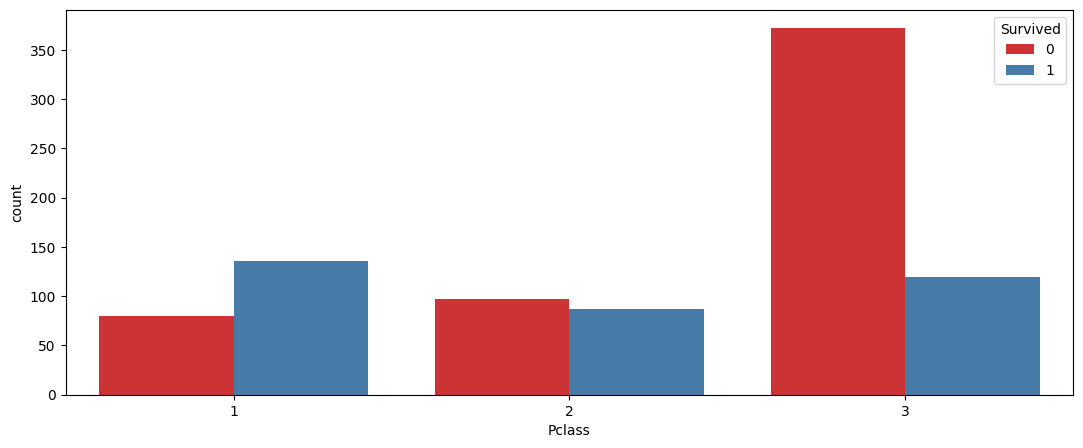

In [143]:
fig, ax = plt.subplots(figsize = (13,5))
sns.countplot(x = 'Pclass', hue = 'Survived', data = df_train, palette = 'Set1')

<Axes: xlabel='Age', ylabel='Density'>

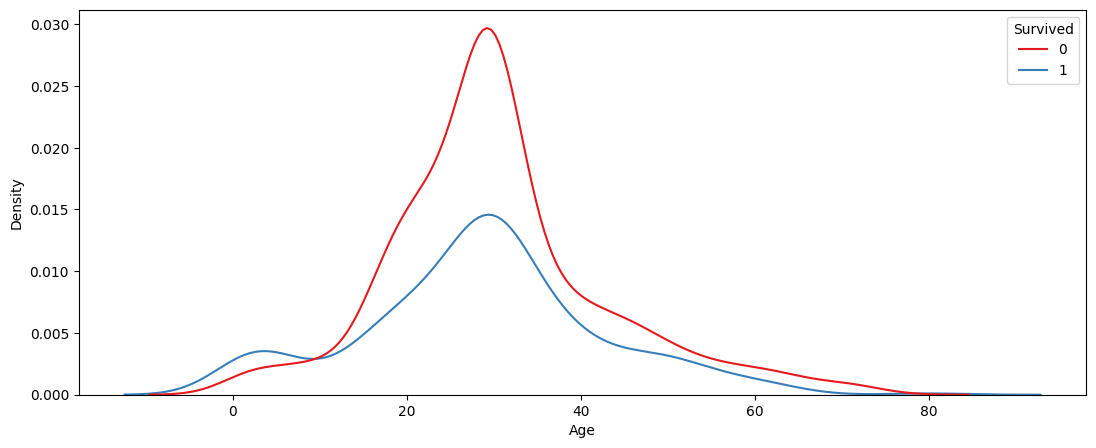

In [144]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(x = 'Age', hue = 'Survived', data = df_train, palette = 'Set1')


In [145]:
features = df_train.drop('Survived',axis=1)
target = df_train['Survived']

In [146]:
scaler= MinMaxScaler()
scaled_features = scaler.fit_transform(features)
features = pd.DataFrame(scaled_features, columns=features.columns)


Test Train Split  

In [147]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [148]:
X_train.to_csv("X_Train.csv")
y_train.to_csv("y_train.csv")
X_test.to_csv("X_test.csv")
y_test.to_csv("y_test.csv")

In [149]:
def evaluate_model(model, x_test, y_test):

    # Predict Test Data
    y_pred = model.predict(X_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa,
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [153]:
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)


LogisticRegression()

In [154]:
y_train_pred = LR_model.predict(X_train)


In [155]:
y_test_pred = LR_model.predict(X_test)


In [156]:
#evaluate model
LR_eval = evaluate_model(LR_model, X_test, y_test)

In [157]:
# Print result
print('Accuracy:', LR_eval['acc'])
print('Precision:', LR_eval['prec'])
print('Recall:', LR_eval['rec'])
print('F1 Score:', LR_eval['f1'])
print('Cohens Kappa Score:', LR_eval['kappa'])
print('Area Under Curve:', LR_eval['auc'])
print('Confusion Matrix:\n', LR_eval['cm'])# Evaluate Model

Accuracy: 0.8100558659217877
Precision: 0.7941176470588235
Recall: 0.7297297297297297
F1 Score: 0.7605633802816901
Cohens Kappa Score: 0.6036212062003387
Area Under Curve: 0.8831402831402831
Confusion Matrix:
 [[91 14]
 [20 54]]


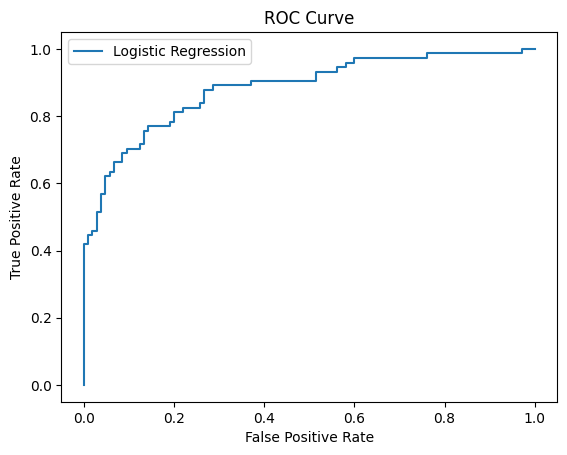

In [158]:
plt.plot(LR_eval['fpr'], LR_eval['tpr'], label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [161]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [162]:
y_train_pred = xgb.predict(X_train)

In [163]:
y_test_pred = xgb.predict(X_test)

In [164]:
#evaluate model
xgb_eval = evaluate_model(xgb, X_test, y_test)

In [165]:
# Print result
print('Accuracy:', xgb_eval['acc'])
print('Precision:', xgb_eval['prec'])
print('Recall:', xgb_eval['rec'])
print('F1 Score:', xgb_eval['f1'])
print('Cohens Kappa Score:', xgb_eval['kappa'])
print('Area Under Curve:', xgb_eval['auc'])
print('Confusion Matrix:\n', xgb_eval['cm'])# Evaluate Model

Accuracy: 0.8324022346368715
Precision: 0.84375
Recall: 0.7297297297297297
F1 Score: 0.782608695652174
Cohens Kappa Score: 0.6474064346684176
Area Under Curve: 0.8805019305019306
Confusion Matrix:
 [[95 10]
 [20 54]]


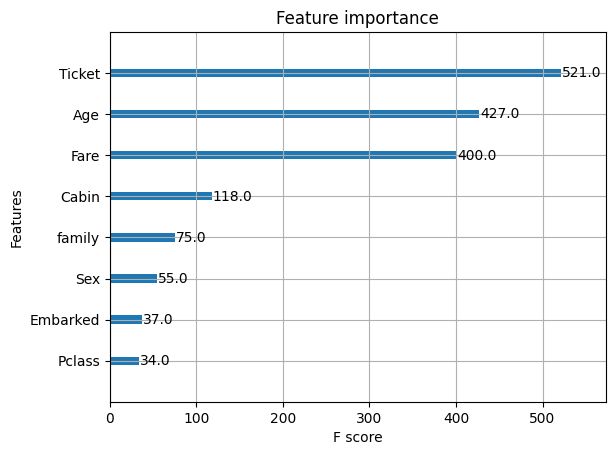

In [168]:
# plot feature importance
plot_importance(xgb)
plt.show()

In [169]:
xgb_importance = xgb.feature_importances_

In [171]:
model_rand = RandomForestClassifier(n_estimators = 100, random_state = 42)
model_rand.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

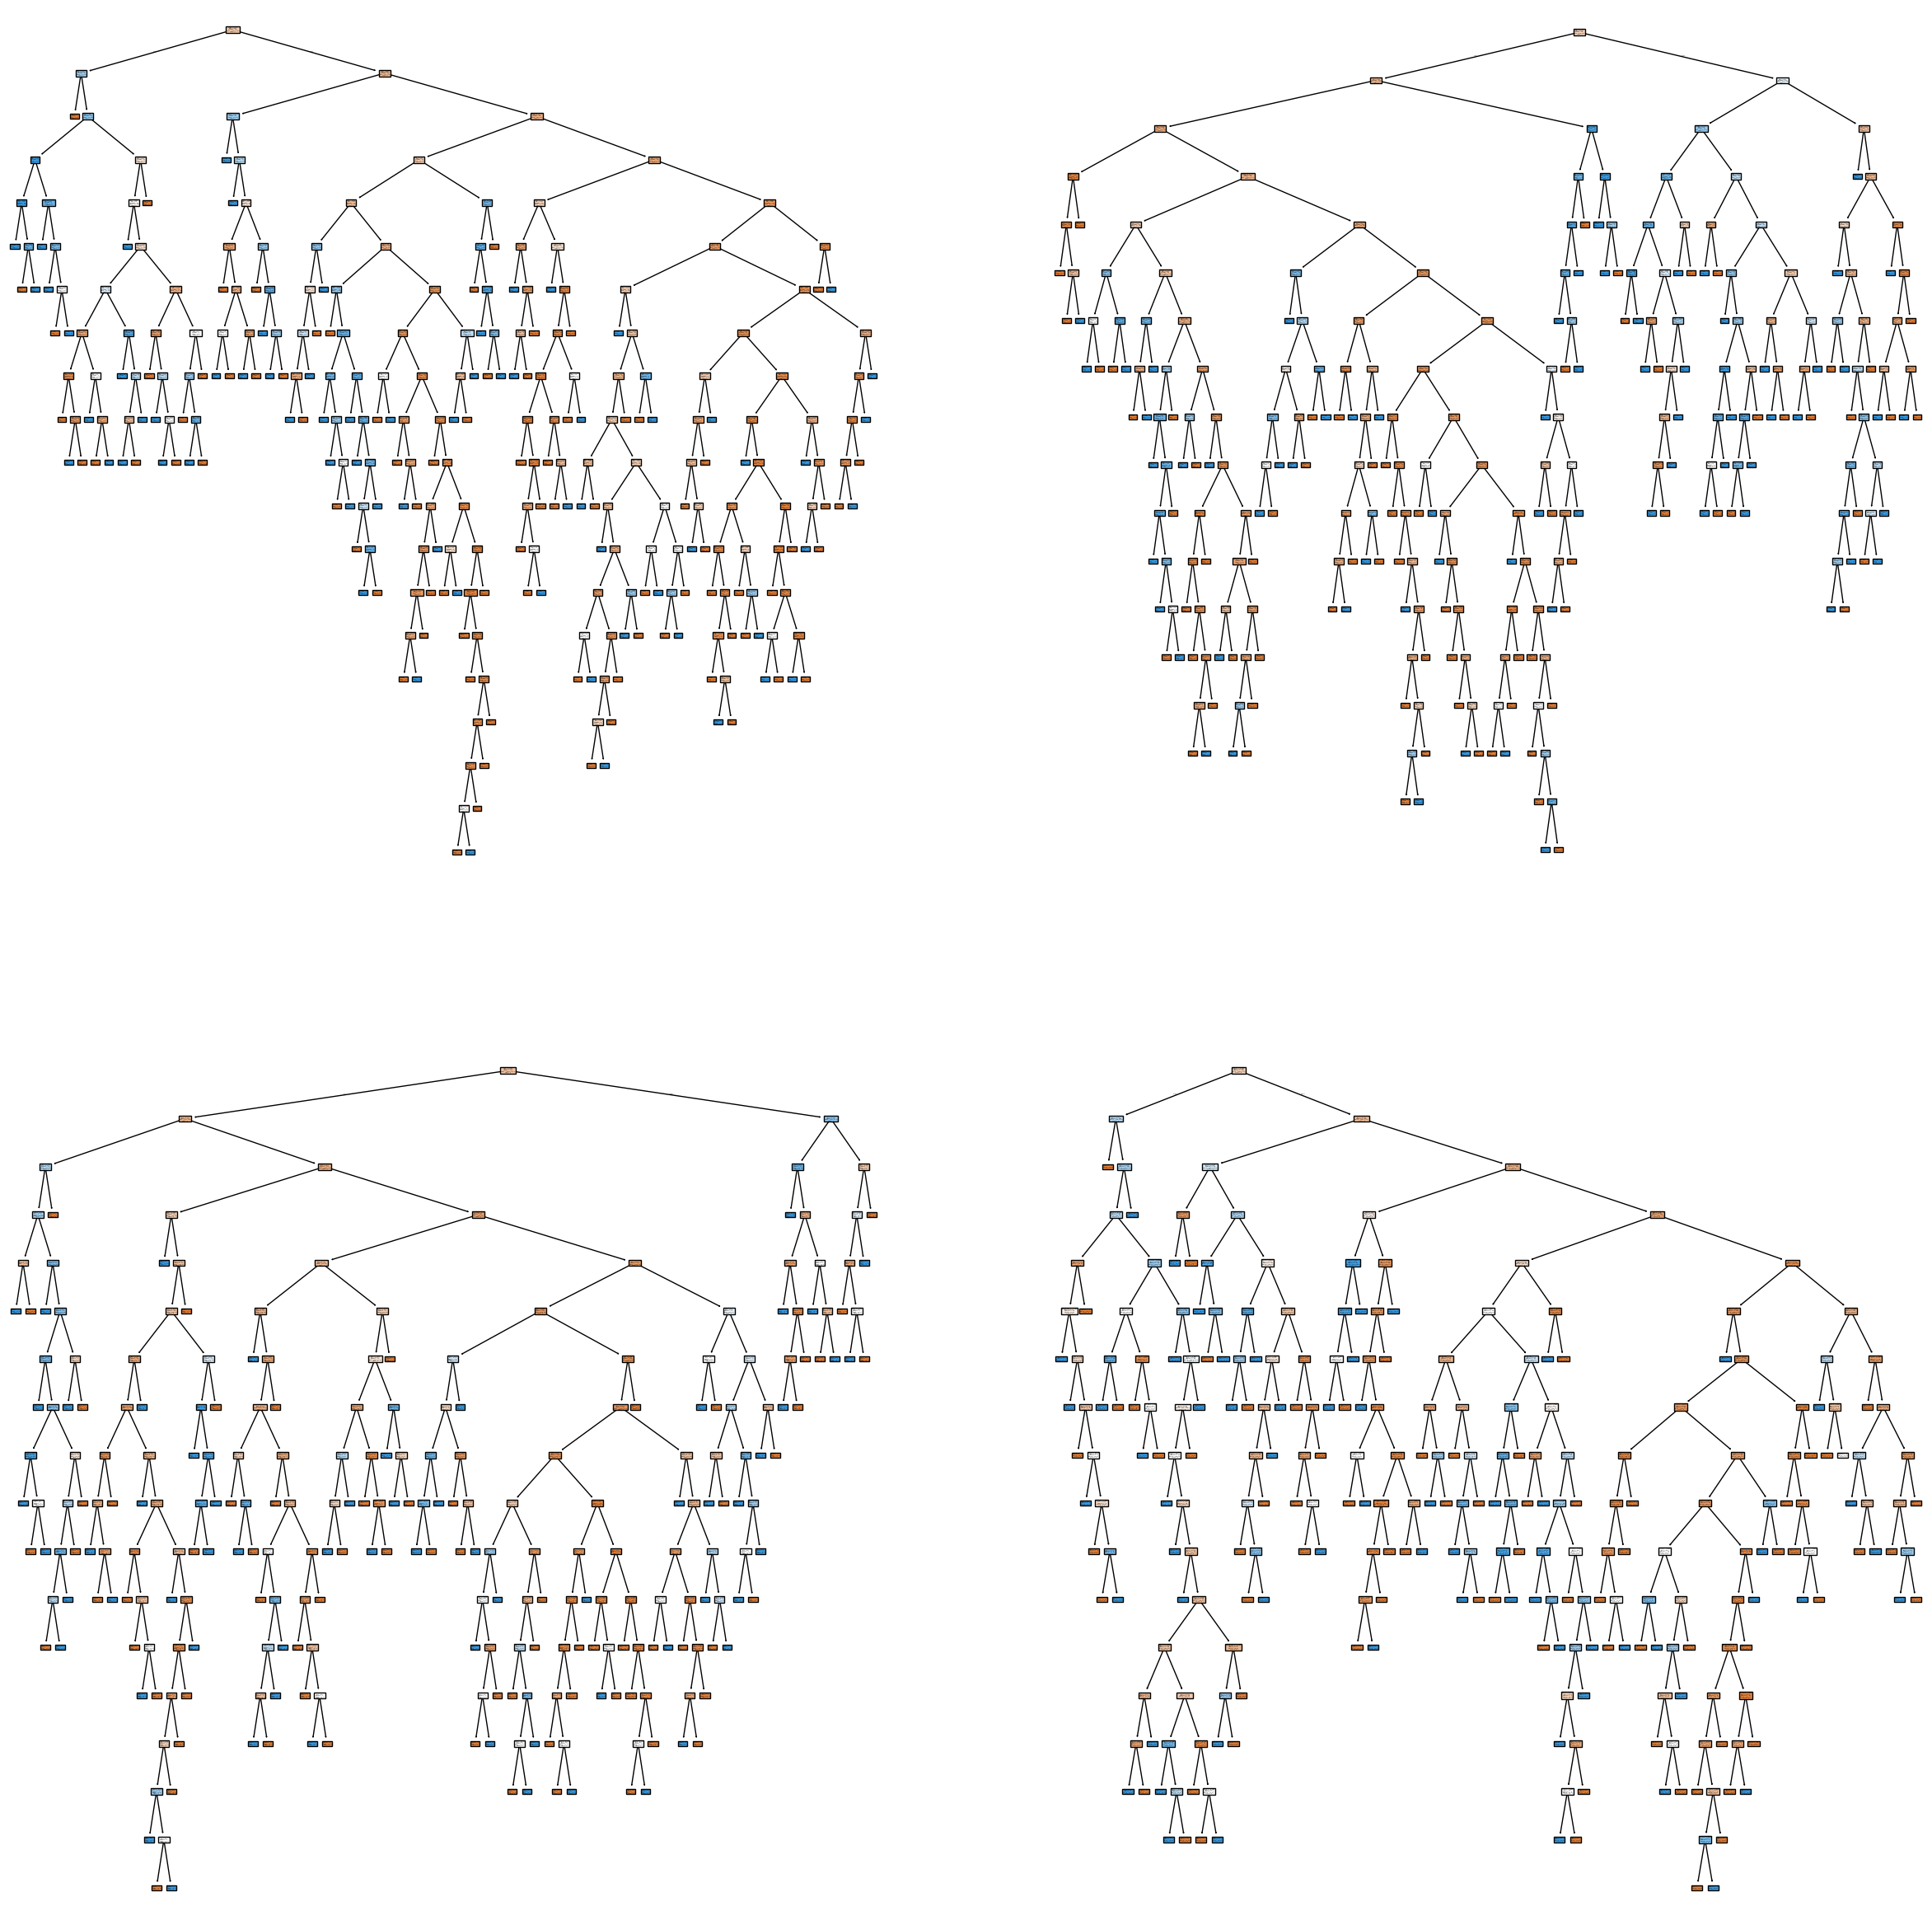

In [174]:
fig, axis = plt.subplots(2, 2, figsize = (30, 30))

# We show the first 4 trees out of the 100 generated (default)
tree.plot_tree(model_rand.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
tree.plot_tree(model_rand.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
tree.plot_tree(model_rand.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
tree.plot_tree(model_rand.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)

plt.show()

In [175]:
y_train_pred = model_rand.predict(X_train)
y_train_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,

In [176]:
#evaluate model
rand_eval = evaluate_model(model_rand, X_test, y_test)

In [177]:
# Print result
print('Accuracy:', rand_eval['acc'])
print('Precision:', rand_eval['prec'])
print('Recall:', rand_eval['rec'])
print('F1 Score:', rand_eval['f1'])
print('Cohens Kappa Score:', rand_eval['kappa'])
print('Area Under Curve:', rand_eval['auc'])
print('Confusion Matrix:\n', rand_eval['cm'])# Evaluate Model

Accuracy: 0.8100558659217877
Precision: 0.7941176470588235
Recall: 0.7297297297297297
F1 Score: 0.7605633802816901
Cohens Kappa Score: 0.6036212062003387
Area Under Curve: 0.8918275418275419
Confusion Matrix:
 [[91 14]
 [20 54]]


In [180]:
#Random Search HyperParameters
parameters = {
              'n_estimators':[10,20,50,100],
              'max_depth':[1,2,3,4],
              'min_samples_leaf':[1,2,3,4,5],
              'min_samples_split':[2,3,4,5],
              'max_features':[3,4,5,6,7,8]
             }
scorer = make_scorer(f1_score)

In [183]:
random = RandomizedSearchCV(model_rand, parameters, scoring=scorer)
random

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [1, 2, 3, 4],
                                        'max_features': [3, 4, 5, 6, 7, 8],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'n_estimators': [10, 20, 50, 100]},
                   scoring=make_scorer(f1_score, response_method='predict'))

In [184]:
# Fit the model to your data
random_out = random.fit(X_train, y_train)
random_out

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [1, 2, 3, 4],
                                        'max_features': [3, 4, 5, 6, 7, 8],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'n_estimators': [10, 20, 50, 100]},
                   scoring=make_scorer(f1_score, response_method='predict'))

In [185]:
best = random_out.best_estimator_
best

RandomForestClassifier(max_depth=4, max_features=4, min_samples_leaf=2,
                       min_samples_split=3, n_estimators=50, random_state=42)

In [186]:
#evaluate model
best_rand_eval = evaluate_model(best, X_test, y_test)

In [188]:
# Print result
print('Accuracy:', best_rand_eval['acc'])
print('Precision:', best_rand_eval['prec'])
print('Recall:', best_rand_eval['rec'])
print('F1 Score:', best_rand_eval['f1'])
print('Cohens Kappa Score:', best_rand_eval['kappa'])
print('Area Under Curve:', best_rand_eval['auc'])
print('Confusion Matrix:\n', best_rand_eval['cm'])# Evaluate Model

Accuracy: 0.8100558659217877
Precision: 0.803030303030303
Recall: 0.7162162162162162
F1 Score: 0.7571428571428571
Cohens Kappa Score: 0.6020141250326968
Area Under Curve: 0.8938867438867439
Confusion Matrix:
 [[92 13]
 [21 53]]


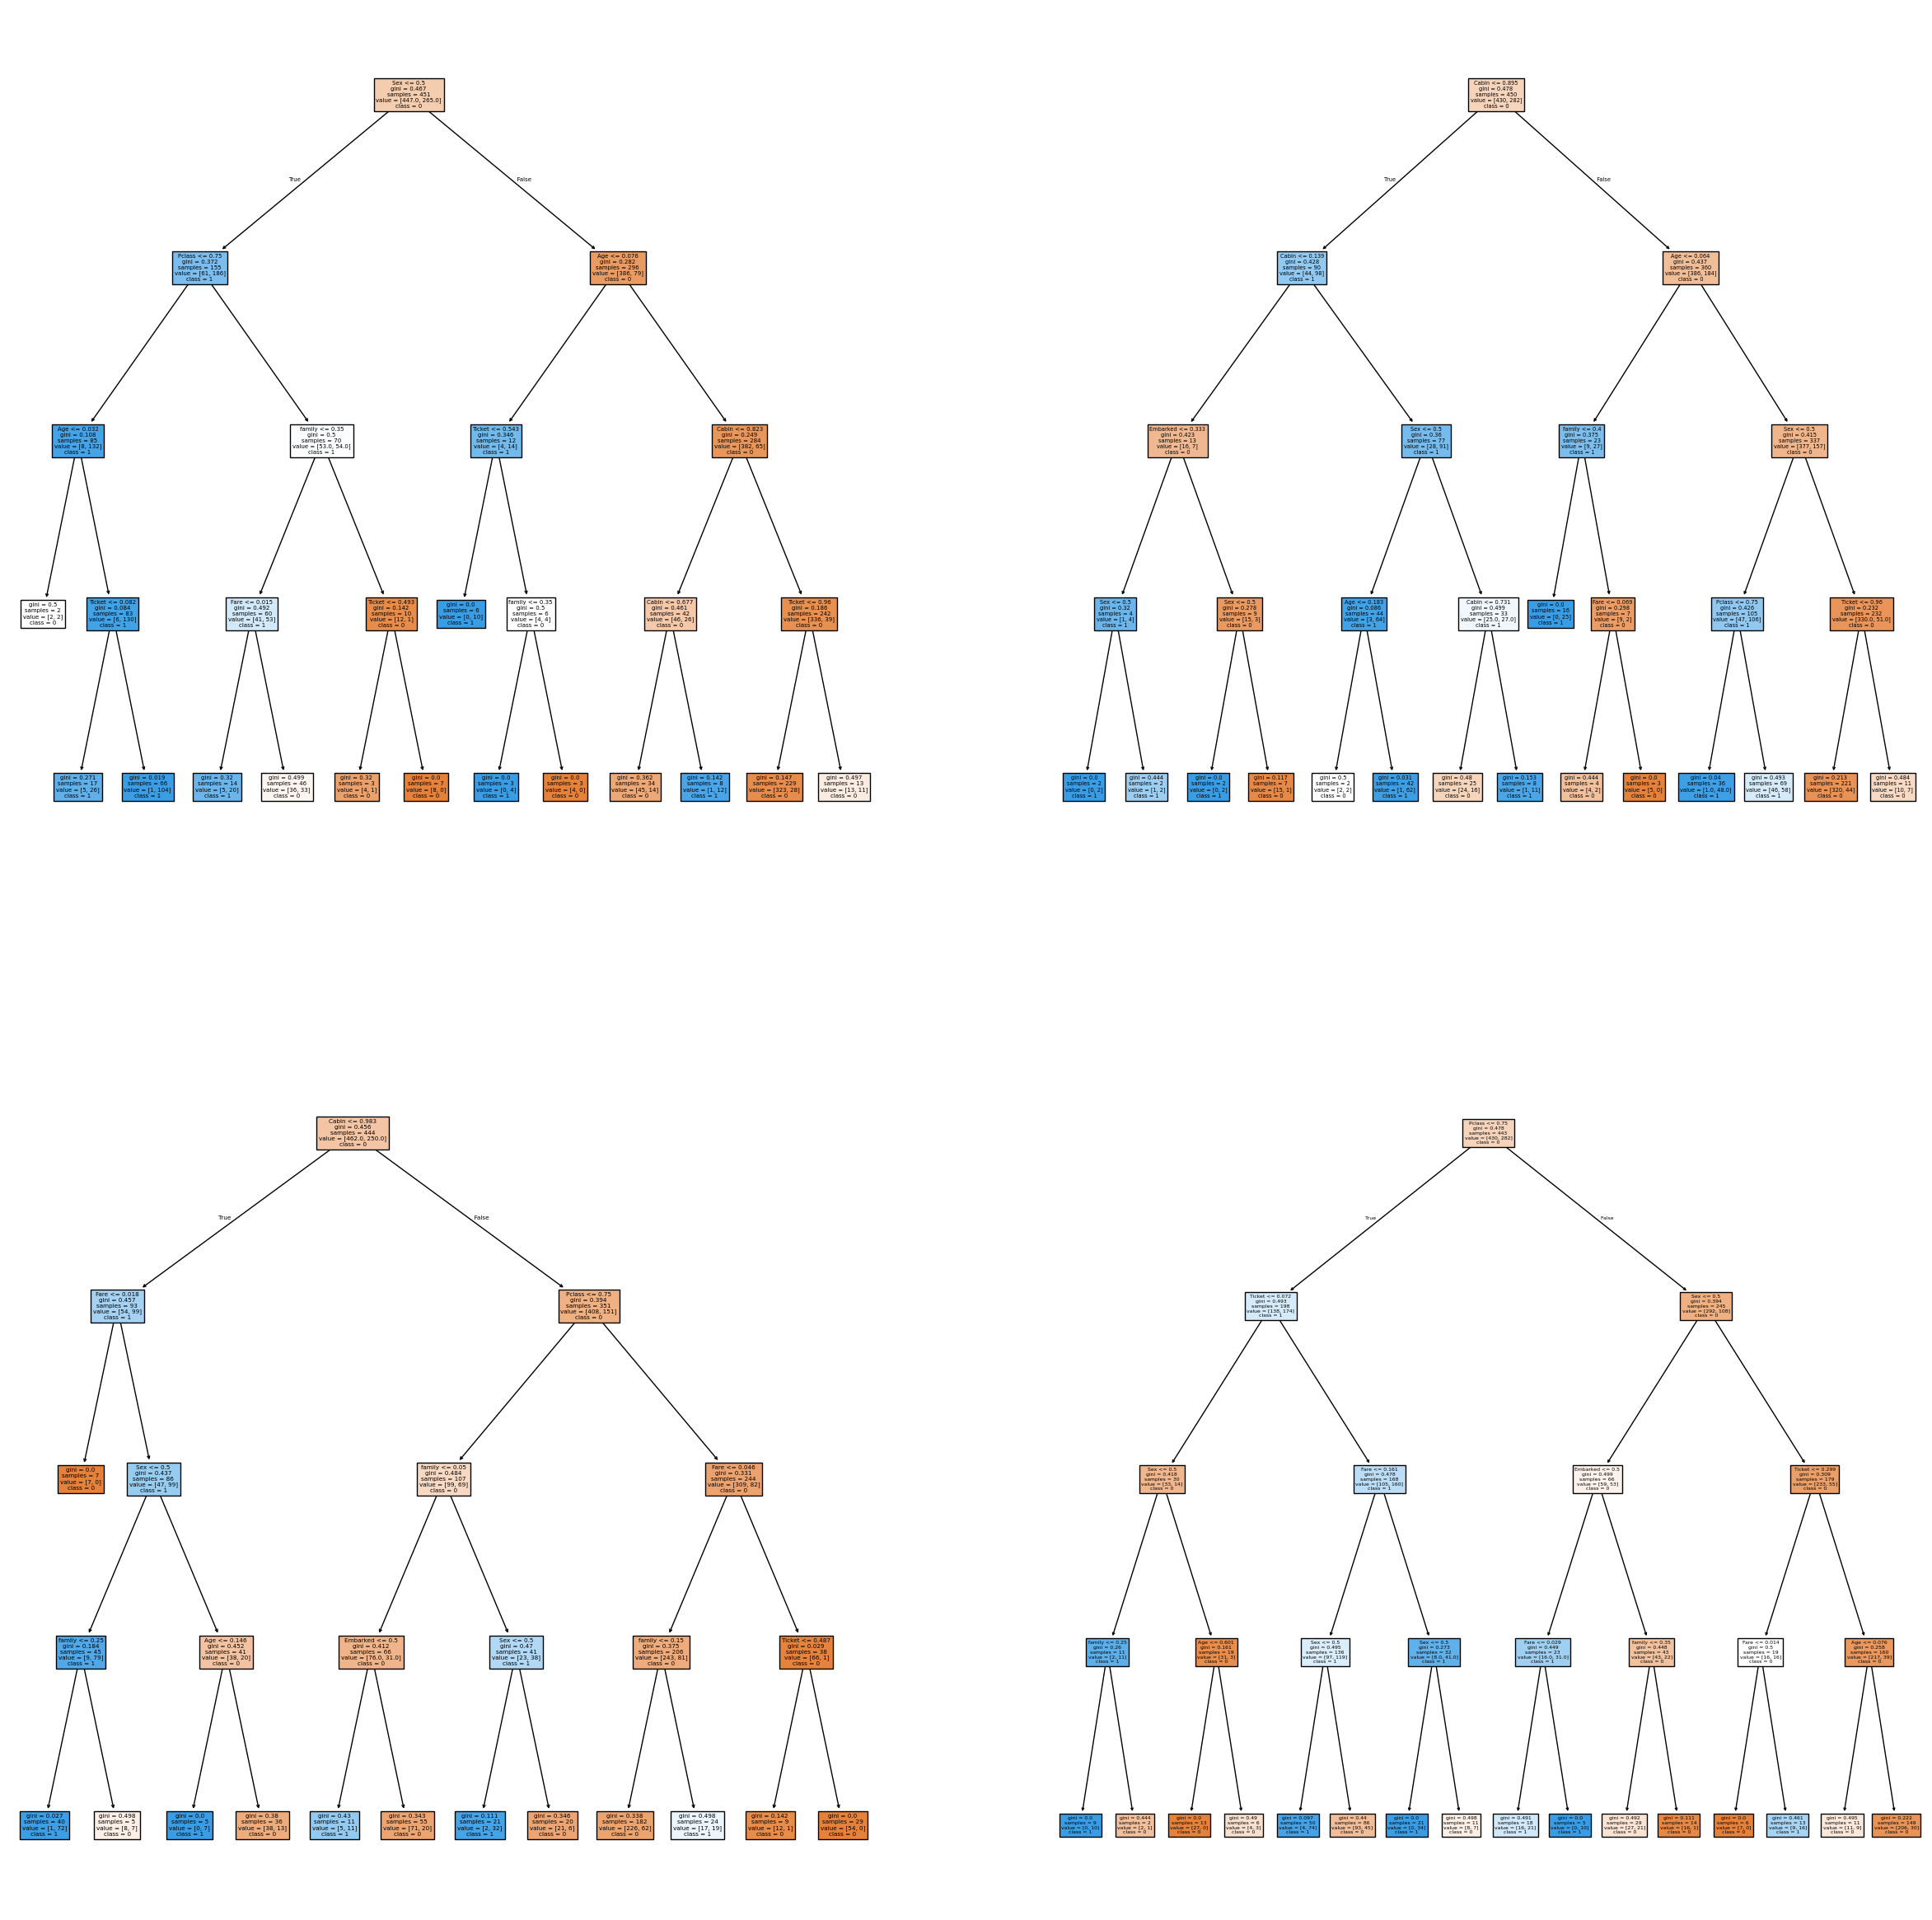

In [187]:
fig, axis = plt.subplots(2, 2, figsize = (30, 30))

# We show the first 4 trees out of the 100 generated (default)
tree.plot_tree(best.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
tree.plot_tree(best.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
tree.plot_tree(best.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
tree.plot_tree(best.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)

plt.show()

Text(0.5, 1.0, 'Feature Importance')

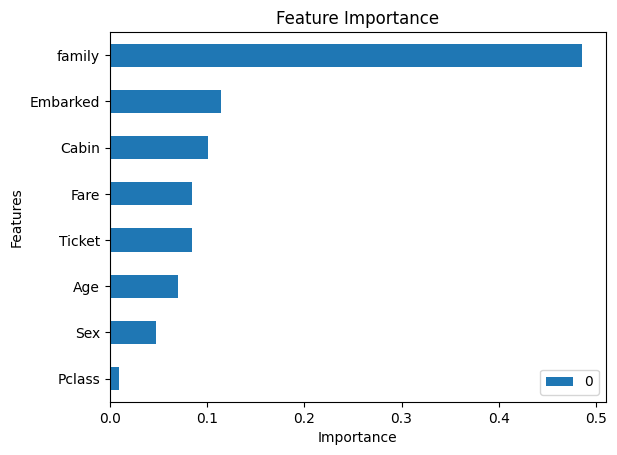

In [189]:
pd.DataFrame(best.feature_importances_).sort_values(by=0, ascending=True).plot.barh()
plt.ylabel("Features")
plt.yticks(np.arange(len(X_train.columns)), list(X_train.columns))
plt.xlabel("Importance")
plt.title("Feature Importance")